<a href="https://colab.research.google.com/github/mollyhealey3-stack/QNC-Tutorials/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

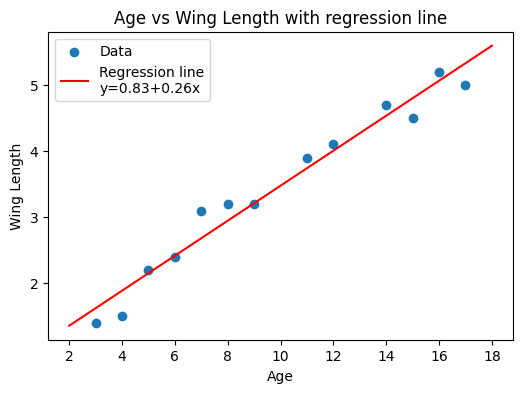

3. Hypothesis test for slope:
   p-value = 3.010e-09
   Reject H0 (b=0)? Yes


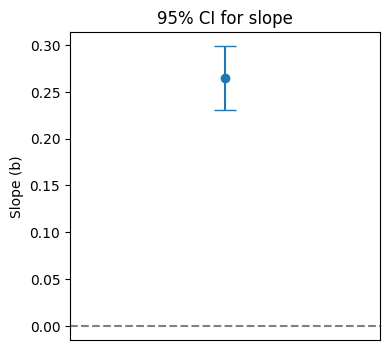

4. 95% CI for slope: (np.float64(0.23043927955854424), np.float64(0.2989289617618884))
5. Coefficient of determination (R^2) = 0.9634
6. Pearson's r = 0.9815


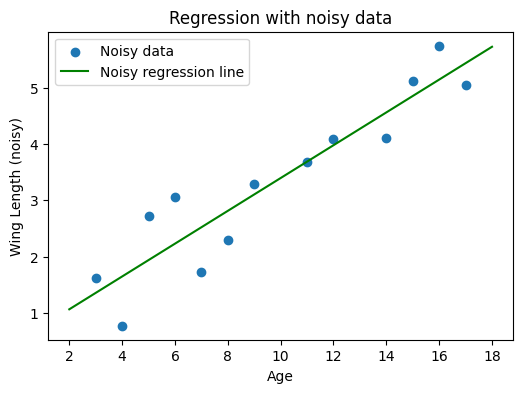

7. After adding noise:
   slope = 0.2914
   intercept = 0.4809
   p-value = 5.962e-06 -> reject H0? Yes
   R^2 = 0.8557
   Pearson's r = 0.9250


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# =========================
# Data
# =========================
age = np.array([3,4,5,6,7,8,9,11,12,14,15,16,17], dtype=float)
wing = np.array([1.4,1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0], dtype=float)
n = len(age)

# Fit regression
res = stats.linregress(age, wing)
slope, intercept, r_value, p_value, slope_stderr = res
r_squared = r_value**2
df = n - 2

# Critical value for 95% CI
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)
slope_ci_lower = slope - t_crit * slope_stderr
slope_ci_upper = slope + t_crit * slope_stderr

# =========================
# 1 & 2. Scatter + regression line
# =========================
plt.figure(figsize=(6,4))
plt.scatter(age, wing, label="Data")
x_vals = np.linspace(age.min()-1, age.max()+1, 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'r', label=f"Regression line\ny={intercept:.2f}+{slope:.2f}x")
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Age vs Wing Length with regression line")
plt.legend()
plt.show()

# =========================
# 3. Hypothesis test for slope
# =========================
print("3. Hypothesis test for slope:")
print(f"   p-value = {p_value:.3e}")
print(f"   Reject H0 (b=0)? {'Yes' if p_value < alpha else 'No'}")

# =========================
# 4. Confidence interval on slope
# =========================
plt.figure(figsize=(4,4))
plt.errorbar(1, slope,
             yerr=[[slope - slope_ci_lower], [slope_ci_upper - slope]],
             fmt='o', capsize=8)
plt.axhline(0, linestyle='--', color="gray")
plt.xticks([])
plt.ylabel("Slope (b)")
plt.title("95% CI for slope")
plt.show()

print("4. 95% CI for slope:", (slope_ci_lower, slope_ci_upper))

# =========================
# 5. Coefficient of determination (R^2)
# =========================
print(f"5. Coefficient of determination (R^2) = {r_squared:.4f}")

# =========================
# 6. Pearson's r
# =========================
print(f"6. Pearson's r = {r_value:.4f}")

# =========================
# 7. Add noise and refit regression
# =========================
rng = np.random.default_rng(42)
wing_noisy = wing + rng.normal(0, 0.7, size=wing.shape)
res_noisy = stats.linregress(age, wing_noisy)

plt.figure(figsize=(6,4))
plt.scatter(age, wing_noisy, label="Noisy data")
plt.plot(x_vals, res_noisy.intercept + res_noisy.slope * x_vals, 'g', label="Noisy regression line")
plt.xlabel("Age")
plt.ylabel("Wing Length (noisy)")
plt.title("Regression with noisy data")
plt.legend()
plt.show()

print("7. After adding noise:")
print(f"   slope = {res_noisy.slope:.4f}")
print(f"   intercept = {res_noisy.intercept:.4f}")
print(f"   p-value = {res_noisy.pvalue:.3e} -> reject H0? {'Yes' if res_noisy.pvalue < alpha else 'No'}")
print(f"   R^2 = {res_noisy.rvalue**2:.4f}")
print(f"   Pearson's r = {res_noisy.rvalue:.4f}")
